In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = pd.read_csv("transactions.csv")

In [72]:
data

,Transaction ID,Timestamp,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR),Status
0,4d3db980-46cd-4158-a812-dcb77055d0d2,2024-06-22 04:06:38,Tiya Mall,4161803452@okaxis,Mohanlal Golla,7776849307@okybl,3907.34,FAILED
1,099ee548-2fc1-4811-bf92-559c467ca792,2024-06-19 06:04:49,Mohanlal Bakshi,8908837379@okaxis,Mehul Sankaran,7683454560@okaxis,8404.55,SUCCESS
2,d4c05732-6b1b-4bab-90b9-efe09d252b99,2024-06-04 04:56:09,Kismat Bora,4633654150@okybl,Diya Goel,2598130823@okicici,941.88,SUCCESS
3,e8df92ee-8b04-4133-af5a-5f412180c8ab,2024-06-09 09:56:07,Ayesha Korpal,7018842771@okhdfcbank,Rhea Kothari,2246623650@okaxis,8926.00,SUCCESS
4,e7d675d3-04f1-419c-a841-7a04662560b7,2024-06-25 08:38:19,Jivin Batta,1977143985@okybl,Baiju Issac,5245672729@okybl,2800.55,SUCCESS
...,...,...,...,...,...,...,...,...
995,843d87b5-902e-4336-9438-aa76d74e13e4,2024-07-03 23:15:06,Anay Karan,7041132054@okhdfcbank,Dhanush Salvi,7858014473@okicici,9270.15,SUCCESS
996,2dbbb577-4617-44b1-9a51-5fdf18ebb2ab,2024-06-15 15:42:57,Nirvaan Aurora,1200592114@okybl,Faiyaz Kara,2795494339@okhdfcbank,2278.32,FAILED
997,7c38e684-5968-432e-8acb-5bbe0f718fad,2024-06-18 17:27:37,Bhamini Srinivasan,6922445535@okicici,Mishti Kala,5207563362@okybl,4857.89,FAILED
998,27624b55-fd6d-45ce-bbc5-0c2958d48865,2024-06-05 21:57:36,Krish Kohli,4638471232@okhdfcbank,Sahil Bail,9348631179@okaxis,9475.68,FAILED


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction ID   1000 non-null   object 
 1   Timestamp        1000 non-null   object 
 2   Sender Name      1000 non-null   object 
 3   Sender UPI ID    1000 non-null   object 
 4   Receiver Name    1000 non-null   object 
 5   Receiver UPI ID  1000 non-null   object 
 6   Amount (INR)     1000 non-null   float64
 7   Status           1000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 62.6+ KB


In [76]:
data.columns

Index(['Transaction ID', 'Timestamp', 'Sender Name', 'Sender UPI ID',
       'Receiver Name', 'Receiver UPI ID', 'Amount (INR)', 'Status'],
      dtype='object')

In [78]:
data.describe()

,Amount (INR)
count,1000.000000
mean,4999.022930
std,2873.484534
min,28.520000
25%,2521.620000
50%,4951.435000
75%,7315.835000
max,9993.060000


In [80]:
#converting object to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d %H:%M:%S')

# Create separate columns for date and time
data['Date'] = data['Timestamp'].dt.date
data['Time'] = data['Timestamp'].dt.time

# Drop the original 'Timestamp' column
data.drop(columns=['Timestamp'], inplace=True)

In [81]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')   # object to date

In [83]:
data.rename(columns={'Amount (INR)': 'Amount','Sender UPI ID':'Sender_id',"Receiver UPI ID":'Receiver_id'},
           inplace=True)

In [84]:
data.head(2)

,Transaction ID,Sender Name,Sender_id,Receiver Name,Receiver_id,Amount,Status,Date,Time
0,4d3db980-46cd-4158-a812-dcb77055d0d2,Tiya Mall,4161803452@okaxis,Mohanlal Golla,7776849307@okybl,3907.34,FAILED,2024-06-22,04:06:38
1,099ee548-2fc1-4811-bf92-559c467ca792,Mohanlal Bakshi,8908837379@okaxis,Mehul Sankaran,7683454560@okaxis,8404.55,SUCCESS,2024-06-19,06:04:49


In [87]:
received = data.groupby(['Receiver Name','Receiver_id'])['Amount'].sum()
print("HIGHEST RECEIVED USE :")
received.nlargest(1).reset_index()

HIGHEST RECEIVED USE :


,Receiver Name,Receiver_id,Amount
0,Devansh Wagle,1050658519@okaxis,9993.06


In [89]:
print("HIGHEST RECEIVED USE :")
received.nsmallest(1).reset_index()

HIGHEST RECEIVED USE :


,Receiver Name,Receiver_id,Amount
0,Stuvan Dar,7966207941@okicici,28.52


In [90]:
top20 = data.groupby(['Sender_id','Sender Name'])['Amount'].sum().nlargest(20).reset_index()
top20

,Sender_id,Sender Name,Amount
0,8347576235@okicici,Shlok Loke,9993.06
1,8562122542@okybl,Siya Trivedi,9979.32
2,3173202042@okybl,Taimur Barad,9978.85
3,3676327128@okybl,Shlok Randhawa,9958.65
4,1176434262@oksbi,Alisha Kurian,9952.14
5,4488458759@okybl,Sana Bath,9946.74
6,1955948456@okaxis,Ishaan Shere,9917.23
7,3536950826@okybl,Divij Sandal,9916.43
8,9294628620@okicici,Ryan Setty,9915.11
9,6691830943@oksbi,Baiju Hayre,9914.17


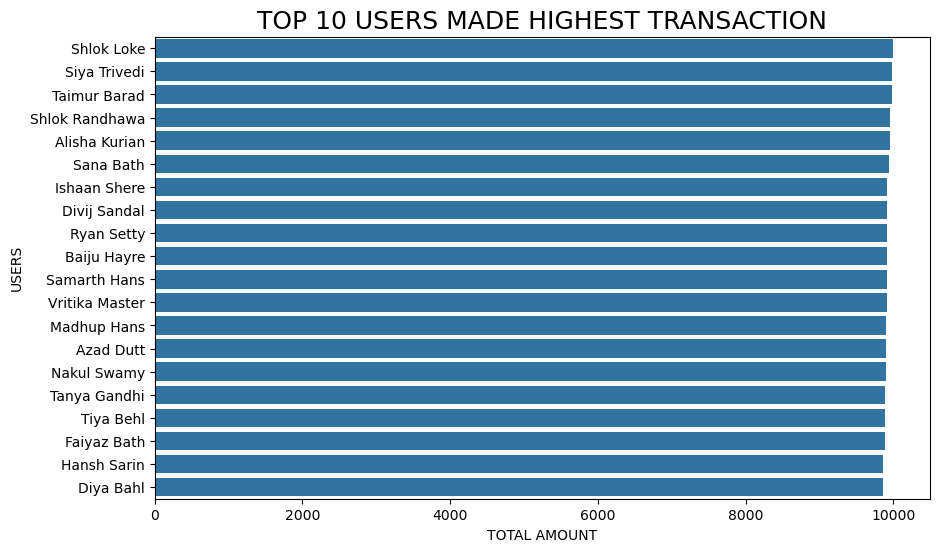

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot( x='Amount',y='Sender Name', data=top20,orient='h')
plt.title('TOP 10 USERS MADE HIGHEST TRANSACTION',fontsize=18)
plt.xlabel('TOTAL AMOUNT')
plt.ylabel('USERS')
plt.show()

In [93]:
data['Day'] = data['Date'].dt.day_name()
data.head(1)

,Transaction ID,Sender Name,Sender_id,Receiver Name,Receiver_id,Amount,Status,Date,Time,Day
0,4d3db980-46cd-4158-a812-dcb77055d0d2,Tiya Mall,4161803452@okaxis,Mohanlal Golla,7776849307@okybl,3907.34,FAILED,2024-06-22,04:06:38,Saturday


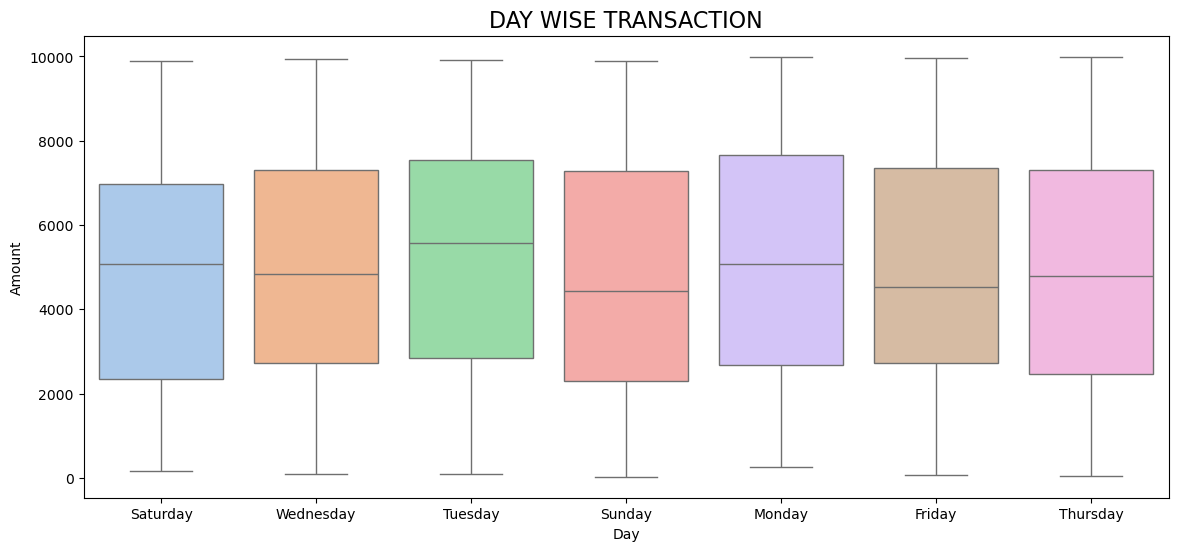

In [94]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Day',y='Amount',data=data,palette='pastel') 
plt.title('DAY WISE TRANSACTION',fontsize=16)
plt.show()

In [96]:
status = data['Status'].value_counts().reset_index()
status

,Status,count
0,SUCCESS,502
1,FAILED,498


Text(0.5, 1.0, 'SUCCESS AND FAILURE PERCENTAGES')

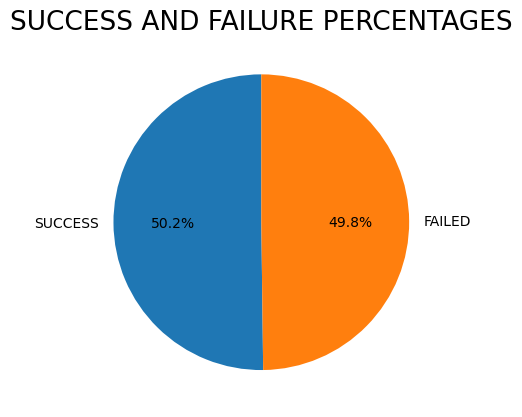

In [98]:
plt.pie(status['count'],labels=status['Status'],autopct='%1.1f%%',startangle=90)
plt.title("SUCCESS AND FAILURE PERCENTAGES",fontsize=19)

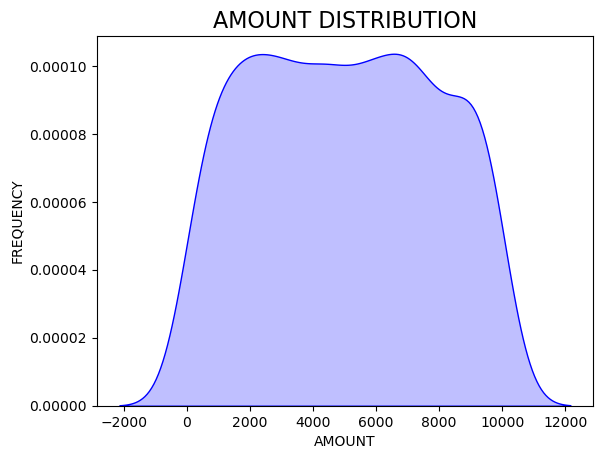

In [99]:
sns.kdeplot(data=data, x='Amount', fill=True, color='blue')
plt.xlabel('AMOUNT')
plt.ylabel('FREQUENCY')
plt.title('AMOUNT DISTRIBUTION',fontsize=16)
plt.show()

In [100]:
data.groupby('Status')['Amount'].max().reset_index()

,Status,Amount
0,FAILED,9914.17
1,SUCCESS,9993.06


In [101]:
day = data.groupby('Date')['Amount'].sum().sort_index().reset_index()
day.head(10)

,Date,Amount
0,2024-06-04,166223.08
1,2024-06-05,119883.91
2,2024-06-06,118234.20
3,2024-06-07,202291.69
4,2024-06-08,164445.17
5,2024-06-09,168112.07
6,2024-06-10,173385.05
7,2024-06-11,183524.75
8,2024-06-12,180444.95
9,2024-06-13,184357.23


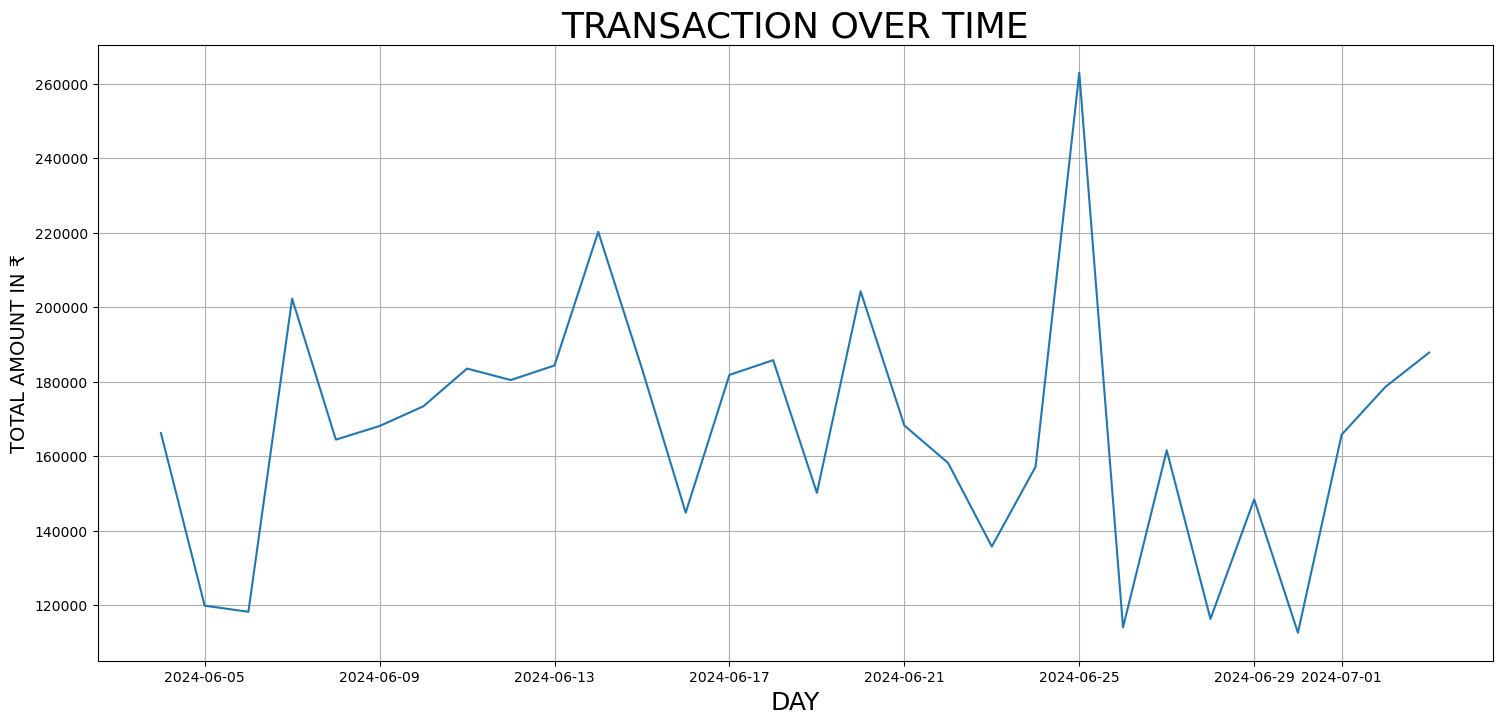

In [102]:
plt.figure(figsize=(18, 8))
plt.plot(day['Date'],day['Amount'])
plt.xlabel("DAY",fontsize=18)
plt.ylabel('TOTAL AMOUNT IN ₹',fontsize=14)
plt.title("TRANSACTION OVER TIME",fontsize=26)
plt.grid(True)
plt.show()

## CONCLUSION

#### The analysis of UPI transaction data reveals valuable insights into Indian consumer behavior and digital payment trends. UPI’s positive impact on the Indian economy and business growth opportunities are evident.